## Espace des phases et graphe des fonctions du modèle Lotka-Volterra "classqiue".

Ce notebook permet de tracer les graphes des fonctions des deux populations ainsi que l'espace des phases. 
Il est largement inspiré d'un notebook trouvé [ici](http://scipy.github.io/old-wiki/pages/Cookbook/LoktaVolterraTutorial).

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import odeint
from numpy.linalg import norm
from pylab import *
import pylab as p
from scipy import integrate
%matplotlib inline

In [2]:
a=3;b=2;c=3;d=1
def f(x,y):
    f=a*x-b*x*y
    return f
def g(x,y):
    g=-c*y+d*x*y
    return g

In [3]:
def dX_dt(X, t=0):
    return array([f(X[0],X[1]),g(X[0],X[1])])
t = linspace(0, 15,  1000)              # time
X0 = array([2, 5]) 
X=integrate.odeint(dX_dt, X0, t)
  

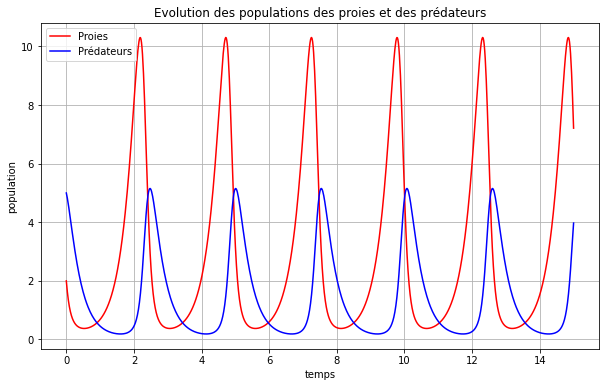

In [4]:
rabbits, foxes = X.T
f1 = p.figure(figsize=(10,6))
plt.plot(t, rabbits, 'r-', label='Proies')
plt.plot(t, foxes  , 'b-', label='Prédateurs')
plt.grid()
plt.legend(loc='best')
plt.xlabel('temps')
plt.ylabel('population')
plt.title('Evolution des populations des proies et des prédateurs')
f1.savefig('graphesFonctionsProiesPredateurs.pdf')

L'espace des phases avec les points fixes, les isoclines, le champ de vecteurs.


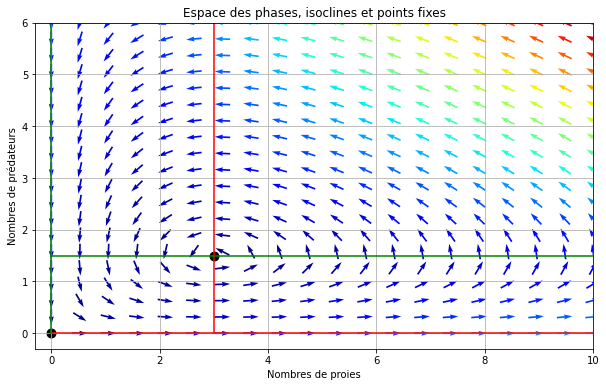

In [7]:

f2 = plt.figure(figsize=(10,6))

xmax=10

ymax = 6                       
nb_points   = 20

x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)

X1 , Y1  = meshgrid(x, y)                       
DX1, DY1 = dX_dt([X1, Y1])                      
M = (hypot(DX1, DY1))                           # 
M[ M == 0] = 1.                                 # 
DX1 /= M                                        
DY1 /= M

#-------------------------------------------------------


p.title('Espace des phases, isoclines et points fixes')
Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
plt.plot([c/d,c/d],[0,ymax],'red')
plt.plot([0,xmax],[0,0],'red')
plt.plot([0,xmax],[a/b,a/b],'green')
plt.plot([0,0],[0,ymax],'green')
plt.scatter(0,0,c='black',s=80)
plt.scatter(c/d,a/b,c='black',s=80)
plt.xlabel('Nombres de proies')
plt.ylabel('Nombres de prédateurs')

plt.grid()
                             

plt.xlim(-0.3, xmax)
plt.ylim(-0.3, ymax)

f2.savefig('phasesLotka.pdf')

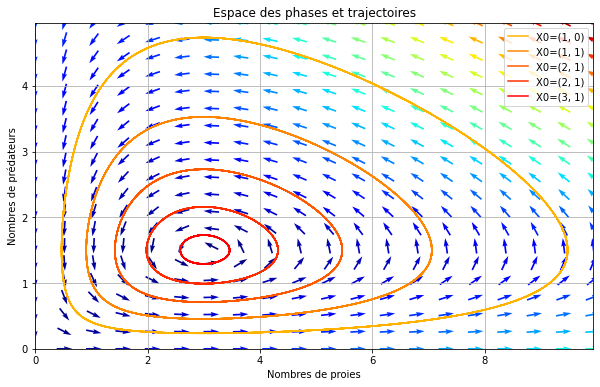

In [8]:
values  = linspace(0.3, 0.9, 5)                          
vcolors = p.cm.autumn_r(linspace(0.3, 1., len(values))) 
X_f1 = array([ c/d, a/b])
f2 = p.figure(figsize=(10,6))
#-------------------------------------------------------
#
for v, col in zip(values, vcolors):
    X0 = v * X_f1                               
    X = integrate.odeint( dX_dt, X0, t)         
    p.plot( X[:,0], X[:,1], lw=1.5, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )

#-------------------------------------------------------

ymax = p.ylim(ymin=0)[1]                        
xmax = p.xlim(xmin=0)[1]
nb_points   = 20

x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)

X1 , Y1  = meshgrid(x, y)                       
DX1, DY1 = dX_dt([X1, Y1])                      
M = (hypot(DX1, DY1))                           
M[ M == 0] = 1.                                  
DX1 /= M                                        
DY1 /= M

#-------------------------------------------------------
# 
p.title('Espace des phases et trajectoires')
Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)

p.xlabel('Nombres de proies')
p.ylabel('Nombres de prédateurs')
p.legend()
p.grid()
p.xlim(0, xmax)
p.ylim(0, ymax)
f2.savefig('TrajectoiresLotka.pdf')